___________________________________________________________________________
   
                                    QP
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 5
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.0022941
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 150
   
   Predicting ...
   Predicting - done. Time (sec):  0.0003991
   
   Prediction time/pt. (sec) :  0.0000027
   


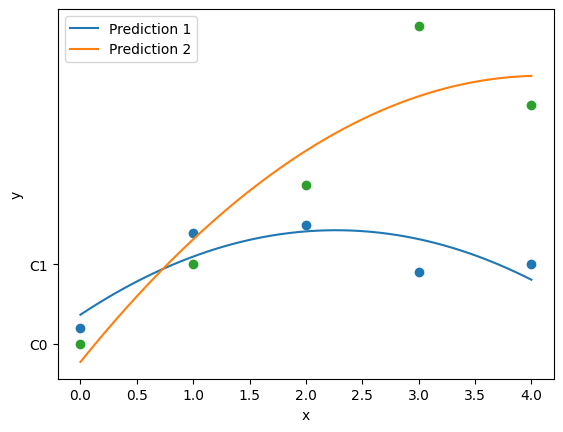

In [5]:
import matplotlib.pyplot as plt
import numpy as np

from smt.surrogate_models import QP

xt = np.array([[0.0, 1.0, 2.0, 3.0, 4.0]]).T
yt = np.array([[0.2, 1.4, 1.5, 0.9, 1.0], [0.0, 1.0, 2.0, 4, 3]]).T

sm = QP()
sm.set_training_values(xt, yt)
sm.train()

num = 150
x = np.linspace(0.0, 4.0, num)
y = sm.predict_values(x)

plt.plot(xt, yt[:, 0], "o", "C0")
plt.plot(x, y[:, 0], "C0", label="Prediction 1")
plt.plot(xt, yt[:, 1], "o", "C1")
plt.plot(x, y[:, 1], "C1", label="Prediction 2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 4
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.0587220
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 100
   
   Predicting ...
   Predicting - done. Time (sec):  0.0002091
   
   Prediction time/pt. (sec) :  0.0000021
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 4
   
   Predicting ...
   Predicting - done. Time (sec):  0.0001860
   
   Prediction time/pt. (sec) :  0.0000465
   


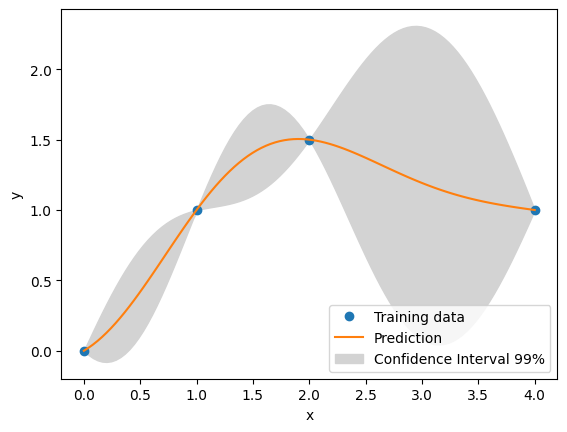

In [9]:
from smt.surrogate_models import KRG

xt = np.array([0.0, 1.0, 2.0, 4.0])
yt = np.array([0.0, 1.0, 1.5, 1.0])

sm = KRG(theta0=[1e-2])
sm.set_training_values(xt, yt)
sm.train()

num = 100
x = np.linspace(0.0, 4.0, num)
y = sm.predict_values(x)
# estimated variance
s2 = sm.predict_variances(x)
# derivative according to the first variable
_dydx = sm.predict_derivatives(xt, 0)
_, axs = plt.subplots(1)

# add a plot with variance
axs.plot(xt, yt, "o")
axs.plot(x, y)
axs.fill_between(
    np.ravel(x),
    np.ravel(y - 3 * np.sqrt(s2)),
    np.ravel(y + 3 * np.sqrt(s2)),
    color="lightgrey",
)
axs.set_xlabel("x")
axs.set_ylabel("y")
axs.legend(
    ["Training data", "Prediction", "Confidence Interval 99%"],
    loc="lower right",
)

plt.show()

___________________________________________________________________________
   
                                    RBF
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 7
   
___________________________________________________________________________
   
 Training
   
   Training ...
      Initializing linear solver ...
         Performing LU fact. (7 x 7 mtx) ...
         Performing LU fact. (7 x 7 mtx) - done. Time (sec):  0.0001862
      Initializing linear solver - done. Time (sec):  0.0002291
      Solving linear system (col. 0) ...
         Back solving (7 x 7 mtx) ...
         Back solving (7 x 7 mtx) - done. Time (sec):  0.0001631
      Solving linear system (col. 0) - done. Time (sec):  0.0001991
   Training - done. Time (sec):  0.0009010
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 150
   
   Predicting ...
   Predicting 

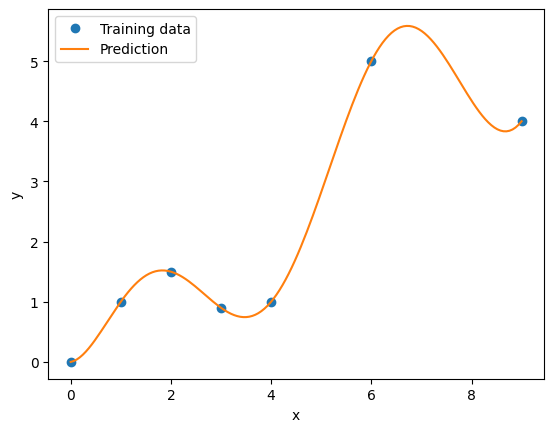

In [7]:
from smt.surrogate_models import RBF

xt = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 6.0, 9.0])
yt = np.array([0.0, 1.0, 1.5, 0.9, 1.0, 5.0, 4.0])

sm = RBF(d0=5)
sm.set_training_values(xt, yt)
sm.train()

num = 150
x = np.linspace(0.0, 9.0, num)
y = sm.predict_values(x)

plt.plot(xt, yt, "o")
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Training data", "Prediction"])
plt.show()
